In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [268]:
df = pd.read_csv('dataset.csv')

In [269]:
kategori = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
numerikal = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
date = ['Month']

# Pre-Processing

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

## Handling Missing Value

In [271]:
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

* Pada data numerik, terdapat Null yang cukup banyak sehingga ditangani dengan fill menggunakan median.  
* Median dipilih karena distribusi data yang skew ke kanan.  
* Nilai yang tinggi di ujung kanan distribusi akan menarik nilai mean ke arah yang lebih tinggi daripada nilai Median.

In [272]:
#handling missing value with median
df['Administrative'] = df['Administrative'].fillna(value=df['Administrative'].median())
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(value=df['Administrative_Duration'].median())
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(value=df['ProductRelated_Duration'].median())
df['BounceRates'] = df['BounceRates'].fillna(value=df['BounceRates'].median())

Pada data kategorikal <code>'OperatingSystem'</code> , tidak terdapat banyak nilai Null sehingga dilakukan drop.

In [273]:
df = df.dropna(subset=['OperatingSystems'])

In [274]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Handle Duplicated Data

In [275]:
df.duplicated().sum()

694

In [276]:
df = df.drop_duplicates(keep='first')

In [277]:
df.duplicated().sum()

0

## Handle Categorical

### Grouping

In [278]:
df.Region = df.Region.astype(str).replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Batam', 'Makassar', 'Tangerang', 'Yogyakarta', 'Semarang'])

df.Browser = df.Browser.astype(str).replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                                ['Safari', 'Google Chrome', 'Internet Explorer', 'Mozilla Firefox', 'Microsoft Edge', 'Samsung Internet', 'Maxthon Browser', 'Brave', 'Vivaldi', 'UC Browser', 'DuckDuckGo', 'Opera', 'Netscape Navigator'])

df.OperatingSystems = df.OperatingSystems.astype(str).replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'],
                                                  ['iOS', 'Windows', 'Android', 'MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux'])

df.TrafficType = df.TrafficType.astype(str).replace(['1', '2', '3', '4', '5', '6', '8', '10', '13'],
                                        ['Organic Search', 'Paid Search', 'Direct Traffic', 'Social Media', 'Facebook Ads', 'Referral Traffic', 'Email Marketing ', 'Display Advertising', 'Affiliate Marketing'])

Data yang memiliki count yang sangat kecil akan di drop atau satukan menjadi <code>"Other"</code> value yaitu :  
  
- VisitorType :  
<code>Other</code>
- Operating system :  
<code> 4 (Mac OS), 5 (Blackberry OS), 6 (Chrome OS), 7 (Unix), 8</code>
- Browser :  
<code>7 (Maxthon), 9 (Vivaldi), 11 (DuckDuckGo), 12 (Opera), 13 (Netscape)</code>
- TrafficType :  
<code>9,7,12,14,15,16,17,18,19</code>  


In [279]:
df = df.drop(df.loc[df['VisitorType'] =='Other'].index)

In [280]:
os_replace = ['MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux']
browser_replace =  ['Maxthon Browser', 'Vivaldi', 'DuckDuckGo', 'Opera', 'Netscape Navigator']
traffic_replace = ['9','7','12','14','15','16','17','18','19']

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11649 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11649 non-null  float64
 1   Administrative_Duration  11649 non-null  float64
 2   Informational            11649 non-null  int64  
 3   Informational_Duration   11649 non-null  float64
 4   ProductRelated           11649 non-null  int64  
 5   ProductRelated_Duration  11649 non-null  float64
 6   BounceRates              11649 non-null  float64
 7   ExitRates                11649 non-null  float64
 8   PageValues               11649 non-null  float64
 9   SpecialDay               11649 non-null  float64
 10  Month                    11649 non-null  object 
 11  OperatingSystems         11649 non-null  object 
 12  Browser                  11649 non-null  object 
 13  Region                   11649 non-null  object 
 14  TrafficType              11

In [282]:
df['OperatingSystems'] = df['OperatingSystems'].astype(str).replace(to_replace=os_replace,value='other')
df['Browser'] = df['Browser'].astype(str).replace(to_replace=browser_replace,value='other')
df['TrafficType'] = df['TrafficType'].astype(str).replace(to_replace=traffic_replace,value='other')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11649 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11649 non-null  float64
 1   Administrative_Duration  11649 non-null  float64
 2   Informational            11649 non-null  int64  
 3   Informational_Duration   11649 non-null  float64
 4   ProductRelated           11649 non-null  int64  
 5   ProductRelated_Duration  11649 non-null  float64
 6   BounceRates              11649 non-null  float64
 7   ExitRates                11649 non-null  float64
 8   PageValues               11649 non-null  float64
 9   SpecialDay               11649 non-null  float64
 10  Month                    11649 non-null  object 
 11  OperatingSystems         11649 non-null  object 
 12  Browser                  11649 non-null  object 
 13  Region                   11649 non-null  object 
 14  TrafficType              11

<ipython-input-284-e871a3069032>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)
<ipython-input-284-e871a3069032>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)
<ipython-input-284-e871a3069032>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)
<ipython-input-284-e871a3069032>:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(y=df[cat2[i]],order 

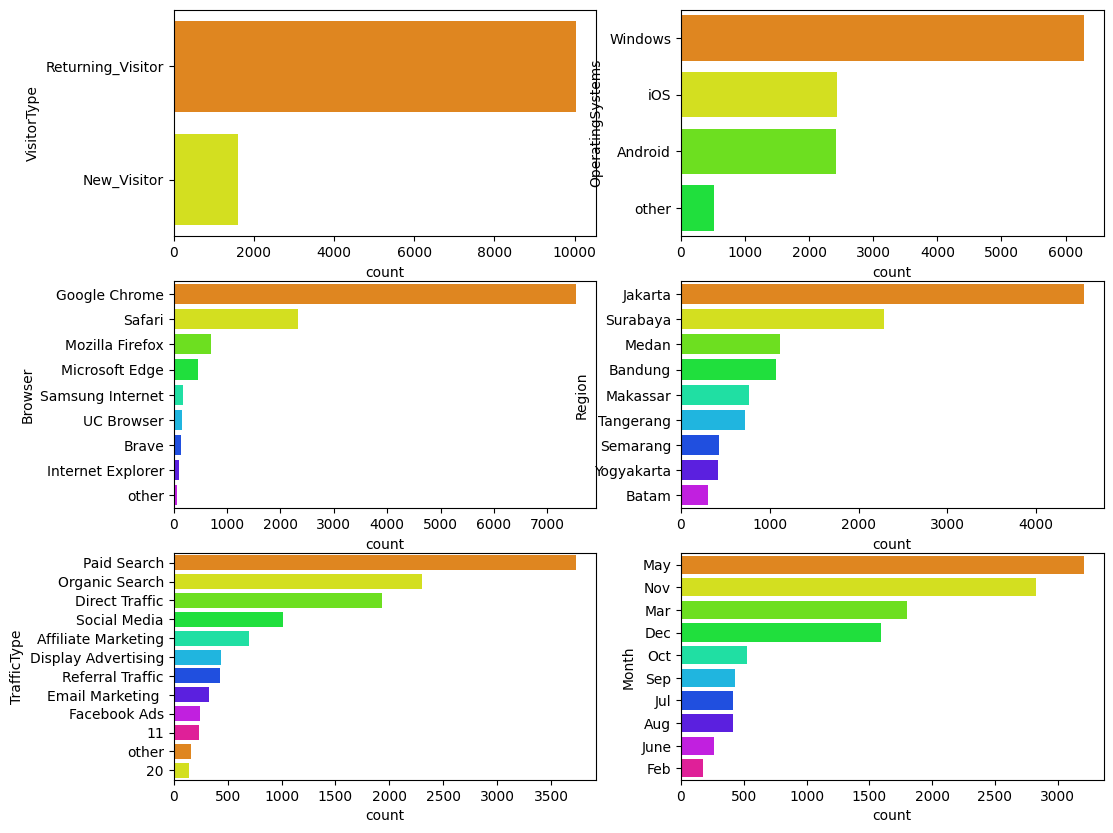

In [284]:
cat2 = ['VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']
palette = sns.color_palette("hsv", 10)
plt.figure(figsize=(12, 10))
for i in range(0,len(cat2)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)

## Categorical Features Encoding

In [285]:
columns_to_encode = ['OperatingSystems', 'Browser',
                     'Region', 'TrafficType','VisitorType', 'Weekend', 'Month']

In [286]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns =columns_to_encode)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
3,0.0,7.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


## Numerical Features Transformation

In [287]:
df[numerikal].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,11649.000000,11649.000000,11649.000000,11649.000000,11649.000000,11649.000000,11649.000000,11649.000000,11649.000000,11649.000000
mean,2.316422,77.995666,0.506567,34.725871,32.037085,1178.788257,0.020655,0.041789,5.924410,0.063010
std,3.312476,173.934457,1.266503,142.027855,44.741564,1897.681848,0.045668,0.046578,18.344393,0.201316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,208.500000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025000,0.000000,0.000000
75%,4.000000,88.250000,0.000000,0.000000,38.000000,1409.809524,0.016667,0.049000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Karena data memiliki Right Skew Distribution, maka dilakukan Log transformation untuk menormalkan sebaran data.

In [288]:
outlier = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
           'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates',
           'PageValues']

In [289]:
for num in df[outlier]:
    min_value = df[df[num] > 0][num].min() / 2
    df[num] = np.log(df[num] + min_value)

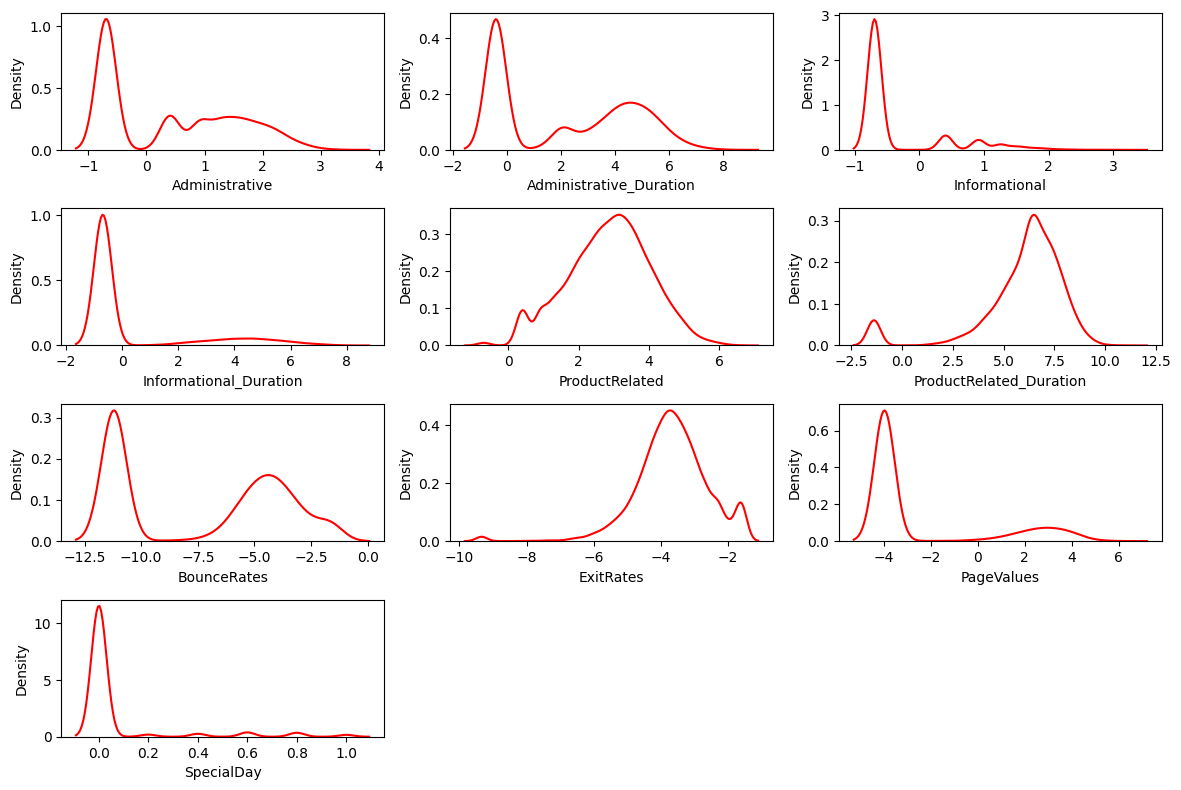

In [290]:
plt.figure(figsize=(12, 8))
for i in range(0,len(numerikal)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[numerikal[i]],color='red')
    plt.xlabel(numerikal[i])
    plt.tight_layout()

## Handling Outlier

In [291]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

# Handling Outlier using Z-Score
for col in outlier:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df_zscore = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier: 11649
Jumlah baris setelah memfilter outlier: 10719


## Splitting Data

In [292]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Revenue'])
y= df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9319, 58)
X_test shape: (2330, 58)
y_train shape: (9319,)
y_test shape: (2330,)


## Numerical Feature Scaling

In [293]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [294]:
df['Revenue'].value_counts(normalize=True)* 100

Revenue
False    84.376341
True     15.623659
Name: proportion, dtype: float64

## Handling Imbalace

Feature dependent memiliki data yang sangat imbalance sehingga dilakukan handling menggunakan teknik SMOTE.

In [295]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_res))

Original dataset shape: Counter({False: 7854, True: 1465})
Resampled dataset shape: Counter({False: 7854, True: 7854})


## Feature Engineering

In [296]:
numerikal2 =  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
               'SpecialDay','Revenue']

<Axes: >

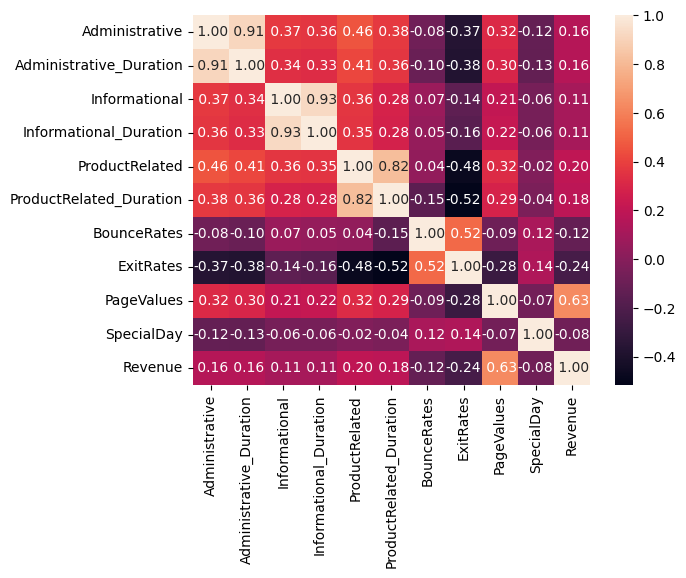

In [297]:
sns.heatmap(df[numerikal2].corr(), annot= True, fmt = ' .2f')

In [298]:
kategori_baru = ['OperatingSystems_Android', 'OperatingSystems_Windows',
       'OperatingSystems_iOS', 'OperatingSystems_other', 'Browser_Brave',
       'Browser_Google Chrome', 'Browser_Internet Explorer',
       'Browser_Microsoft Edge', 'Browser_Mozilla Firefox', 'Browser_Safari',
       'Browser_Samsung Internet', 'Browser_UC Browser', 'Browser_other',
       'Region_Bandung', 'Region_Batam', 'Region_Jakarta', 'Region_Makassar',
       'Region_Medan', 'Region_Semarang', 'Region_Surabaya',
       'Region_Tangerang', 'Region_Yogyakarta', 'TrafficType_11',
       'TrafficType_20', 'TrafficType_Affiliate Marketing',
       'TrafficType_Direct Traffic', 'TrafficType_Display Advertising',
       'TrafficType_Email Marketing ', 'TrafficType_Facebook Ads',
       'TrafficType_Organic Search', 'TrafficType_Paid Search',
       'TrafficType_Referral Traffic', 'TrafficType_Social Media',
       'TrafficType_other', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']

In [300]:
from scipy.stats import pointbiserialr

correlation_results = {}
for column in df[kategori_baru]:
    if column != 'Revenue':
        corr, p_value = pointbiserialr(df[column], df['Revenue'])
        correlation_results[column] = corr

for column, correlation in correlation_results.items():
    print(f"Correlation between 'Revenue' and '{column}': {correlation:.2f}")

Correlation between 'Revenue' and 'OperatingSystems_Android': -0.07
Correlation between 'Revenue' and 'OperatingSystems_Windows': 0.07
Correlation between 'Revenue' and 'OperatingSystems_iOS': -0.01
Correlation between 'Revenue' and 'OperatingSystems_other': 0.01
Correlation between 'Revenue' and 'Browser_Brave': 0.00
Correlation between 'Revenue' and 'Browser_Google Chrome': -0.00
Correlation between 'Revenue' and 'Browser_Internet Explorer': -0.03
Correlation between 'Revenue' and 'Browser_Microsoft Edge': 0.02
Correlation between 'Revenue' and 'Browser_Mozilla Firefox': 0.02
Correlation between 'Revenue' and 'Browser_Safari': -0.01
Correlation between 'Revenue' and 'Browser_Samsung Internet': -0.01
Correlation between 'Revenue' and 'Browser_UC Browser': 0.02
Correlation between 'Revenue' and 'Browser_other': 0.00
Correlation between 'Revenue' and 'Region_Bandung': 0.01
Correlation between 'Revenue' and 'Region_Batam': 0.00
Correlation between 'Revenue' and 'Region_Jakarta': 0.02
Cor

## Feature Selection

Melakukan drop pada feature :
* <code>Administrative_Duration</code> karena memiliki korelasi yang tinggi dengan <code>Administrative</code>.
* <code>Informational_Duration</code> karena memiliki korelasi yang tinggi dengan <code>Informational</code>.
* <code>ProductRelated_Duration</code> karena memiliki korelasi yang tinggi dengan <code>ProductRelated</code>.
* <code>SpecialDay</code> karena korelasi dengan target sangat rendah.

In [ ]:
"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
"""
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Menggunakan metode SelectKBest dengan mutual_info_classif untuk memilih fitur terbaik
selector = SelectKBest(mutual_info_classif, k=20)
selector.fit(X_train, y_train)

# Mendapatkan indeks fitur-fitur terbaik yang telah dipilih
best_feature_indices = selector.get_support(indices=True)

# Mendapatkan nama fitur-fitur terbaik
best_features = list(X_train.columns[best_feature_indices])

# Memanggil fungsi select_best_features untuk memilih  fitur terbaik
sel_feature = select_best_features(X_train, y_train, k=20)

# Memanggil fungsi select_best_features_fc untuk mendapatkan skor fitur-fitur terbaik
df_score_result = select_best_features_fc(X_train, y_train)

# Membuat DataFrame yang berisi nama fitur dan skornya
feature = pd.DataFrame({'Feature': X_train.columns, 'Score': df_score_result})

# Mengurutkan DataFrame berdasarkan skor fitur secara menurun
feature.sort_values(by='Score', ascending=False, inplace=True)

# Menampilkan fitur teratas beserta skornya
print(feature)


                            Feature  Score
8                        PageValues   6.06
5           ProductRelated_Duration   0.63
1           Administrative_Duration   0.36
7                         ExitRates   0.36
6                       BounceRates   0.35
4                    ProductRelated   0.29
0                    Administrative   0.17
3            Informational_Duration   0.12
55                        Month_Nov   0.05
2                     Informational   0.04
40          TrafficType_Paid Search   0.03
35       TrafficType_Direct Traffic   0.02
10         OperatingSystems_Android   0.02
54                        Month_May   0.02
44          VisitorType_New_Visitor   0.02
45    VisitorType_Returning_Visitor   0.02
39       TrafficType_Organic Search   0.01
34  TrafficType_Affiliate Marketing   0.01
9                        SpecialDay   0.01
53                        Month_Mar   0.01
11         OperatingSystems_Windows   0.01
50                        Month_Feb   0.00
41     Traf

In [ ]:
"""
X_train_selected = X_train[sel_feature]

## Modeling

In [301]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    auc = None
    if model_name == 'Logistic Regression':
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)

      result_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'Confusion Matrix': [cm],
        'Classification Report': [report],
        'AUC': [auc] if auc else None

    })

    return result_df

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()
}

results = pd.DataFrame()

for model_name, model in models.items():
    result_df = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    results = pd.concat([results, result_df], ignore_index=True)

print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1465, number of negative: 7854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 9319, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157206 -> initscore=-1.679168
[LightGBM] [Info] Start training from score -1.679168
                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.898283   0.696667  0.588732  0.638168   
1        Decision Tree  0.867382   0.560526  0.600000  0.579592   
2        Random Forest  0.905150   0.783898  0.521127  0.626058   
3    Gradient Boosting  0.909442   0.755319  0.600000  0.668760   
4             LightGBM  0.9051

In [302]:
best_model_acc = results.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Model Terbaik berdasarkan Akurasi:")
print(best_model_acc)

best_model_precision = results.sort_values(by='Precision', ascending=False).iloc[0]
print("\nModel Terbaik berdasarkan Presisi:")
print(best_model_precision)

best_model_recall = results.sort_values(by='Recall', ascending=False).iloc[0]
print("\nModel Terbaik berdasarkan Recall:")
print(best_model_recall)

best_model_f1 = results.sort_values(by='F1 Score', ascending=False).iloc[0]
print("\nModel Terbaik berdasarkan F1 Score:")
print(best_model_f1)

best_model_auc = results.dropna(subset=['AUC']).sort_values(by='AUC', ascending=False).iloc[0]
print("\nModel Terbaik berdasarkan AUC:")
print(best_model_auc)


Model Terbaik berdasarkan Akurasi:
Model                                                    Gradient Boosting
Accuracy                                                          0.909442
Precision                                                         0.755319
Recall                                                                 0.6
F1 Score                                                           0.66876
Confusion Matrix                                  [[1906, 69], [142, 213]]
Classification Report                  precision    recall  f1-score   ...
AUC                                                                   None
Name: 3, dtype: object

Model Terbaik berdasarkan Presisi:
Model                                                        Random Forest
Accuracy                                                           0.90515
Precision                                                         0.783898
Recall                                                            0.521127
F1 Sco

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'Decision Tree': {'max_depth': [None, 5, 10, 15],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [100, 200, 300],
                      'max_depth': [None, 5, 10, 15],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]}
}

results = pd.DataFrame()


for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    result_df = train_and_evaluate_model(model_name, best_model, X_train, y_train, X_test, y_test)

    results = pd.concat([results, result_df], ignore_index=True)

print(results)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
           Model  Accuracy  Precision    Recall  F1 Score  \
0  Decision Tree  0.900858   0.738462  0.540845  0.624390   
1  Random Forest  0.901288   0.775330  0.495775  0.604811   

           Confusion Matrix  \
0  [[1907, 68], [163, 192]]   
1  [[1924, 51], [179, 176]]   

                               Classification Report   AUC  
0                precision    recall  f1-score   ...  None  
1                precision    recall  f1-score   ...  None  
